<a href="https://colab.research.google.com/github/nagashreem363/Dynamic_pricing/blob/main/Dynamic_pricing_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dynamic Pricing Strategy of Walmart Data**

In this project, we explore a retail dataset sourced from GitHub, specifically containing Walmart product data. The datasetcovering various aspects of Walmart’s inventory, represents a product with multiple features that help us understand product trends and behavior in the market.

The primary goal of this project is to perform Exploratory Data Analysis (EDA) to identify patterns and trends in the data and then build a machine learning model that can predict the optimal selling price for a given product.

**Problem Statement**

Analyze the product data to identify trends and patterns, and develop a predictive model that recommends a selling price for any given product in such a way that it helps increase revenue while remaining market-relevant.

Retailers like Walmart deal with thousands of products, each with different pricing strategies. Accurately pricing these products is crucial to maximize sales and revenue while staying competitive in the market. Given a dataset of Walmart product listings with various attributes. By the end of this notebook, we aim to create a system where, after entering product-specific details (such as category, brand, features, etc.), the model will predict an optimal selling price—serving as a valuable tool for revenue enhancement and data-driven pricing strategy.



**About the Dataset:**

The dataset used in this project contains product-level data from Walmart, collected from a GitHub source. It comprises approximately 10,000 entries representing a diverse range of retail products, with information mainly from the year 2022, along with a few entries from early 2023.

Each row in the dataset corresponds to an individual product listing and includes various features that influence customer purchasing behavior and pricing decisions.





# **DATA LOADING**

**Data Loading**

In [ ]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
raw_data=pd.read_csv('/content/walmart_data_updated.csv')
raw_data.sample(4)

,SHIPPING_LOCATION,State,Country,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,SKU,PRODUCT_URL,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,PROMOTION,RunDate,Month,Season
1395,10001,NY,New York County,Snacks,Chips,NaN,Snacks/Chips,845645775,https://www.walmart.com/ip/Potato-Chips,"Lay's Potato Chips, 8 Oz",Lay's,2.99,2.99,8,Regular,07-10-2022,10,Fall
6221,30301,GA,Fulton County,Frozen Foods,Frozen Vegetables,NaN,Frozen Foods/Frozen Vegetables,663185222,https://www.walmart.com/ip/Spinach,"Green Giant Spinach, 16 Oz",Green Giant,2.49,2.49,16,Regular,09-03-2022,3,Spring
3204,79936,TX,El Paso County,Deli,Cheese,NaN,Deli/Cheese,412829280,https://www.walmart.com/ip/Cheddar-Cheese,"Kraft Cheddar Cheese, 8 Oz",Kraft,3.49,3.49,8,Regular,08-07-2022,7,Summer
9528,10001,NY,New York County,Beverages,Juice,NaN,Beverages/Juice,734526831,https://www.walmart.com/ip/Apple-Juice,"Mott's Apple Juice, 64 Oz",Mott's,3.49,3.49,64,Regular,29-04-2022,4,Spring


1.SHIPPING_LOCATION:       City code where the product is shipped from.

2.State:          The U.S. state associated with the shipping location.

3.County: The county (likely always USA in this case).

4.DEPARTMENT: Main product department (e.g., Electronics, Home, Fashion).

5.CATEGORY: Specific product category within the department.

6.SUBCATEGORY: More detailed classification of the product.

7.BREADCRUMBS: Full product path (Department > Category > Subcategory).

8.SKU: Unique product ID or stock-keeping unit.

9.PRODUCT_URL: Web link to the product’s listing.

10.PRODUCT_NAME: Name or title of the product.

11.BRAND: Manufacturer or brand of the product.

12.PRICE_RETAIL: Original price (MRP) before any discount.

13.PRICE_CURRENT: Current selling price after discount.

14.PRODUCT_SIZE: Size or quantity of the product (e.g., 250ml, Pack of 2).

15.PROMOTION: Any ongoing discount or promotional offer.

16.RunDate: The date when the data was recorded.

17.Month: Month extracted from the RunDate.

18.Season: Season of the year (Spring, Summer, Fall, Winter) based on the date.


In [ ]:
raw_data.info()
raw_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SHIPPING_LOCATION  10000 non-null  int64  
 1   State              10000 non-null  object 
 2   Country            10000 non-null  object 
 3   DEPARTMENT         10000 non-null  object 
 4   CATEGORY           10000 non-null  object 
 5   SUBCATEGORY        0 non-null      float64
 6   BREADCRUMBS        10000 non-null  object 
 7   SKU                10000 non-null  int64  
 8   PRODUCT_URL        10000 non-null  object 
 9   PRODUCT_NAME       10000 non-null  object 
 10  BRAND              10000 non-null  object 
 11  PRICE_RETAIL       10000 non-null  float64
 12  PRICE_CURRENT      10000 non-null  float64
 13  PRODUCT_SIZE       10000 non-null  int64  
 14  PROMOTION          10000 non-null  object 
 15  RunDate            10000 non-null  object 
 16  Month              1000

,0
SHIPPING_LOCATION,0
State,0
Country,0
DEPARTMENT,0
CATEGORY,0
SUBCATEGORY,10000
BREADCRUMBS,0
SKU,0
PRODUCT_URL,0
PRODUCT_NAME,0


As subcategory column is completely null, I plan to remove this in the current analysis as it don’t not add any value

In [ ]:
columns_to_keep=["SHIPPING_LOCATION","DEPARTMENT","CATEGORY","SKU","PRODUCT_NAME","Country","State","PRODUCT_SIZE","BRAND","PRICE_RETAIL","PRICE_CURRENT","RunDate","PROMOTION","Season"]


In [ ]:
raw_data=raw_data[columns_to_keep]
raw_data.sample(2)


,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SKU,PRODUCT_NAME,Country,State,PRODUCT_SIZE,BRAND,PRICE_RETAIL,PRICE_CURRENT,RunDate,PROMOTION,Season
1979,79936,Bakery,Pastries,840962720,"Pillsbury Cinnamon Rolls, 8 Oz",El Paso County,TX,8,Pillsbury,3.49,3.49,06-07-2022,Regular,Summer
3283,79936,Beverages,Water,266131338,"Poland Spring Spring Water, 24 Pack",El Paso County,TX,24,Poland Spring,4.99,4.99,04-09-2022,Regular,Fall


Converting the datatype of 'RunDate' from object to Datetime

In [ ]:
raw_data['RunDate'] = pd.to_datetime(raw_data['RunDate'], format='%d-%m-%Y')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SHIPPING_LOCATION  10000 non-null  int64         
 1   DEPARTMENT         10000 non-null  object        
 2   CATEGORY           10000 non-null  object        
 3   SKU                10000 non-null  int64         
 4   PRODUCT_NAME       10000 non-null  object        
 5   Country            10000 non-null  object        
 6   State              10000 non-null  object        
 7   PRODUCT_SIZE       10000 non-null  int64         
 8   BRAND              10000 non-null  object        
 9   PRICE_RETAIL       10000 non-null  float64       
 10  PRICE_CURRENT      10000 non-null  float64       
 11  RunDate            10000 non-null  datetime64[ns]
 12  PROMOTION          10000 non-null  object        
 13  Season             10000 non-null  object        
dtypes: date

/tmp/ipython-input-11-1437982917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['RunDate'] = pd.to_datetime(raw_data['RunDate'], format='%d-%m-%Y')


**Extracting Month and year columns**

In [ ]:
raw_data['month_name'] = raw_data['RunDate'].dt.strftime('%B')
raw_data['year'] = raw_data['RunDate'].dt.year

raw_data.sample(3)

/tmp/ipython-input-12-1083366167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['month_name'] = raw_data['RunDate'].dt.strftime('%B')
/tmp/ipython-input-12-1083366167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['year'] = raw_data['RunDate'].dt.year


,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SKU,PRODUCT_NAME,Country,State,PRODUCT_SIZE,BRAND,PRICE_RETAIL,PRICE_CURRENT,RunDate,PROMOTION,Season,month_name,year
5638,60601,Beverages,Juice,561043996,"Mott's Apple Juice, 64 Oz",Cook County,IL,64,Mott's,3.49,3.49,2022-12-28,Regular,Winter,December,2022
3406,60601,Deli,"Hummus, Dips, & Salsa",838973595,"Marketside Classic Hummus, 10 Oz",Cook County,IL,10,Marketside,2.67,2.67,2022-02-20,Regular,Winter,February,2022
9975,79936,Deli,Cheese,862282959,"Kraft Cheddar Cheese, 8 Oz",El Paso County,TX,8,Kraft,3.49,3.49,2022-06-11,Regular,Summer,June,2022


In [ ]:
raw_data.to_csv('cleaned_data.csv',index=False)
cleaned_data=pd.read_csv('/content/cleaned_data.csv')
cleaned_data.sample(3)

,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SKU,PRODUCT_NAME,Country,State,PRODUCT_SIZE,BRAND,PRICE_RETAIL,PRICE_CURRENT,RunDate,PROMOTION,Season,month_name,year
5667,60601,Beverages,Juice,723530684,"Mott's Apple Juice, 64 Oz",Cook County,IL,64,Mott's,3.49,3.49,2022-03-12,Regular,Spring,March,2022
394,90001,Frozen Foods,Ice Cream,361813919,"Haagen-Dazs Vanilla Ice Cream, 14 Oz",Los Angeles County,CA,14,Haagen-Dazs,4.99,4.99,2022-01-09,Winter Discount,Winter,January,2022
1878,79936,Snacks,Nuts & Seeds,230692347,"Blue Diamond Almonds, 6 Oz",El Paso County,TX,6,Blue Diamond,5.99,5.99,2022-05-14,Regular,Spring,May,2022


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
cleaned_data.describe()

,SHIPPING_LOCATION,SKU,PRODUCT_SIZE,PRICE_RETAIL,PRICE_CURRENT,year
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,53904.508000,5.508995e+08,17.378300,4.186088,4.186088,2022.003000
std,29923.651503,2.609992e+08,15.233069,1.511101,1.511101,0.054693
min,10001.000000,1.001516e+08,2.000000,1.990000,1.990000,2022.000000
25%,30301.000000,3.210946e+08,8.000000,2.990000,2.990000,2022.000000
50%,60601.000000,5.536592e+08,12.000000,3.990000,3.990000,2022.000000
75%,79936.000000,7.784117e+08,20.000000,4.990000,4.990000,2022.000000
max,90001.000000,9.999775e+08,64.000000,7.490000,7.490000,2023.000000


Now we see that there are 10,000 non null values present in this dataset for the year 2022 and 2023

In [ ]:
# County Analysis
county_counts = raw_data['Country'].value_counts().reset_index()
county_counts.columns = ['County Name', 'Shopping Location Count']
print("Unique Counties with Shopping Location Count:")
print(county_counts)

# Category Analysis
category_counts = raw_data['CATEGORY'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
print("\nUnique Categories with Count:")
print(category_counts)

# Brand Analysis
brand_counts = raw_data['BRAND'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Count']
print("\nUnique Brands with Count:")
print(brand_counts)

Unique Counties with Shopping Location Count:
          County Name  Shopping Location Count
0       Fulton County                     2060
1         Cook County                     2025
2     New York County                     1983
3      El Paso County                     1968
4  Los Angeles County                     1964

Unique Categories with Count:
                 Category  Count
0          Prepared Meals    696
1       Frozen Vegetables    693
2                  Cheese    688
3                   Water    688
4                    Soda    677
5                   Juice    676
6                   Cakes    675
7            Frozen Meals    673
8                 Cookies    665
9            Nuts & Seeds    654
10                  Bread    649
11                  Chips    646
12              Ice Cream    642
13  Hummus, Dips, & Salsa    641
14               Pastries    637

Unique Brands with Count:
            Brand  Count
0      Stouffer's    696
1      Marketside    641
2          

## **Total Sales Distribution by County**

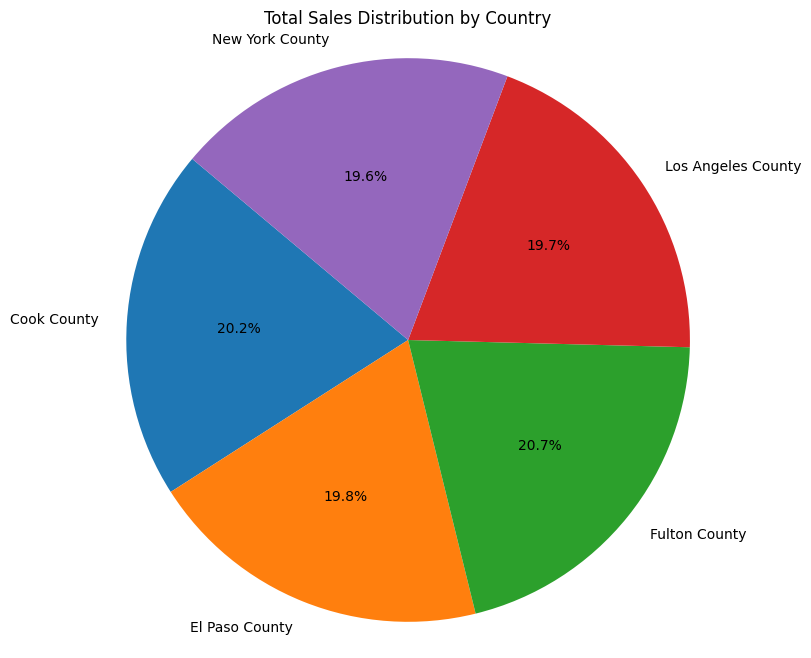

In [ ]:
country_sales = cleaned_data.groupby('Country')['PRICE_CURRENT'].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(country_sales['PRICE_CURRENT'], labels=country_sales['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Distribution by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Walmart data is evenly distributed across all five counties.

## **Total Sales Distribution by County, State and Categories**

/tmp/ipython-input-16-2452481651.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Country', data=cleaned_data, order=cleaned_data['Country'].value_counts().index, ax=axes[0], palette='viridis',hue=None,legend=False)
/tmp/ipython-input-16-2452481651.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State', data=cleaned_data, order=cleaned_data['State'].value_counts().index, ax=axes[1], palette='magma',hue=None,legend=False)
/tmp/ipython-input-16-2452481651.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='CATEGORY', d

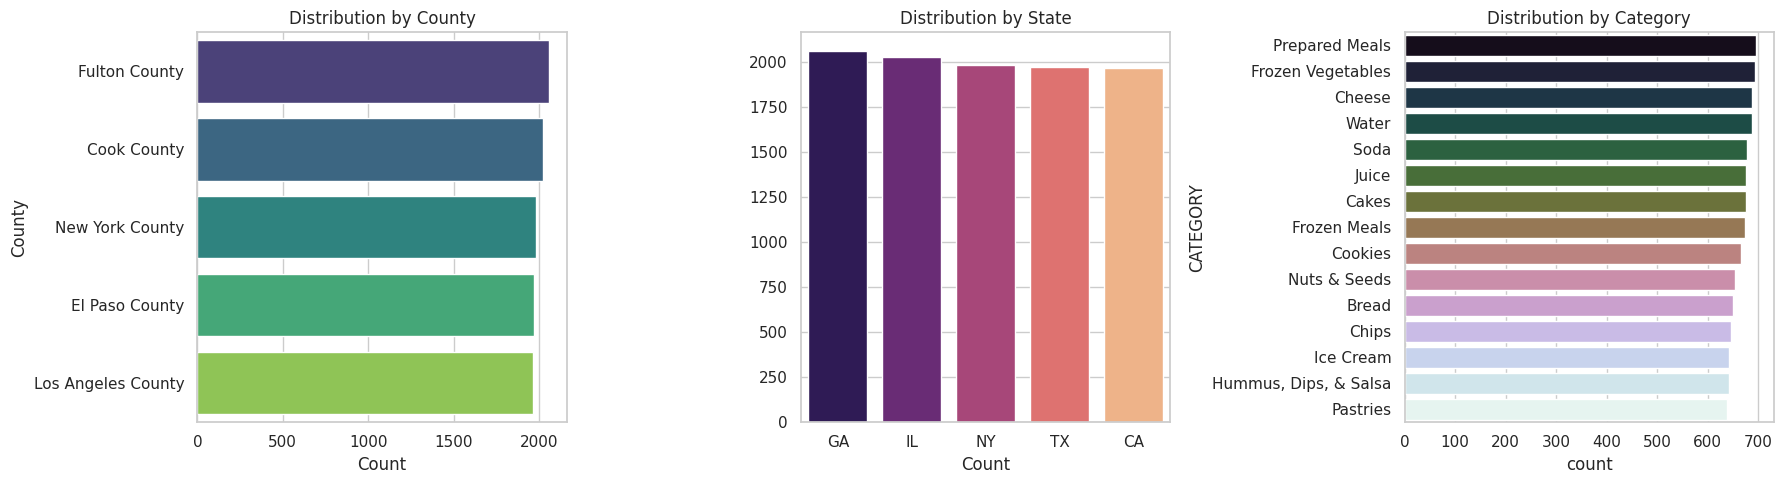

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# County Distribution

sns.countplot(y='Country', data=cleaned_data, order=cleaned_data['Country'].value_counts().index, ax=axes[0], palette='viridis',hue=None,legend=False)
axes[0].set_title('Distribution by County')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('County')

# State Distribution
sns.countplot(x='State', data=cleaned_data, order=cleaned_data['State'].value_counts().index, ax=axes[1], palette='magma',hue=None,legend=False)
axes[1].set_title('Distribution by State')
axes[1].set_ylabel('')
axes[1].set_xlabel('Count')

#Category Distribution
sns.countplot(y='CATEGORY', data=cleaned_data, order=cleaned_data['CATEGORY'].value_counts().index, ax=axes[2], palette='cubehelix',hue=None,legend=False)
axes[2].set_title('Distribution by Category')

# Adjust layout
plt.tight_layout()
plt.show()

**County**: Fulton County has the highest count in terms of sales by county.

**State**: Georgia (GA) has the highest count, while California (CA) has the lowest.

**Category**: Beverages, Deli, Frozen Foods, Snacks, and Bakery are the top product categories.

Georgia and  Illinois are the states with highest sales

## **Top 3 Categories by Sales in Georgia and illinois**

/tmp/ipython-input-17-1753429843.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_ga_il_sales = ga_il_sales.groupby('State').apply(lambda x: x.nlargest(3, 'PRICE_CURRENT')).reset_index(drop=True)


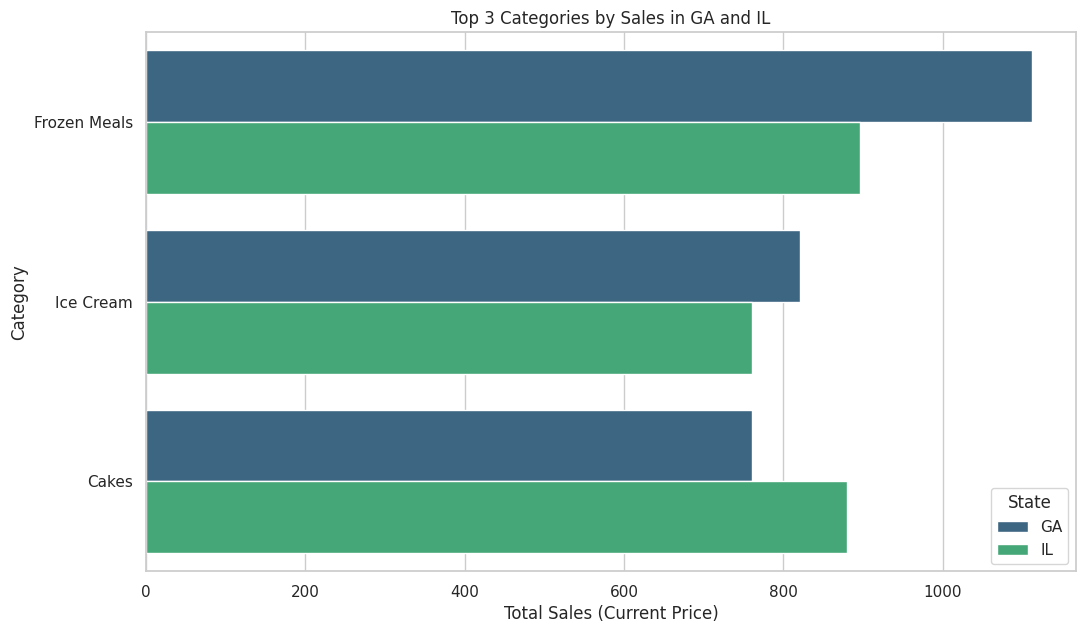

In [ ]:
# Filter data for GA and IL states
ga_il_data = cleaned_data[cleaned_data['State'].isin(['GA', 'IL'])].copy()

# Calculate total current price for each product and category in GA and IL
ga_il_sales = ga_il_data.groupby(['State', 'DEPARTMENT', 'CATEGORY'])['PRICE_CURRENT'].sum().reset_index()

# Get top 3 products/categories for each state based on sales
top_ga_il_sales = ga_il_sales.groupby('State').apply(lambda x: x.nlargest(3, 'PRICE_CURRENT')).reset_index(drop=True)

# Create the bivariate visualization (barplot)
plt.figure(figsize=(12, 7))
sns.barplot(data=top_ga_il_sales, x='PRICE_CURRENT', y='CATEGORY', hue='State', palette='viridis')
plt.title('Top 3 Categories by Sales in GA and IL')
plt.xlabel('Total Sales (Current Price)')
plt.ylabel('Category')
plt.show()

We see that from previous graph **GEORGIA** AND **ILLINOIS** are the top two states in sales distribution

From the above graph we observe that the TOP categories sold in those state are:
**FROZEN MEALS, CAKES AND ICECREAM**

## **Top Products Sold (Frozen Foods, Ice Cream, Cakes) in Georgia and Illinois**

/tmp/ipython-input-18-3908067262.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_by_state = product_sales.groupby('State').apply(lambda x: x.nlargest(5, 'PRICE_CURRENT')).reset_index(drop=True) # Adjust 5 if you want more/fewer top products


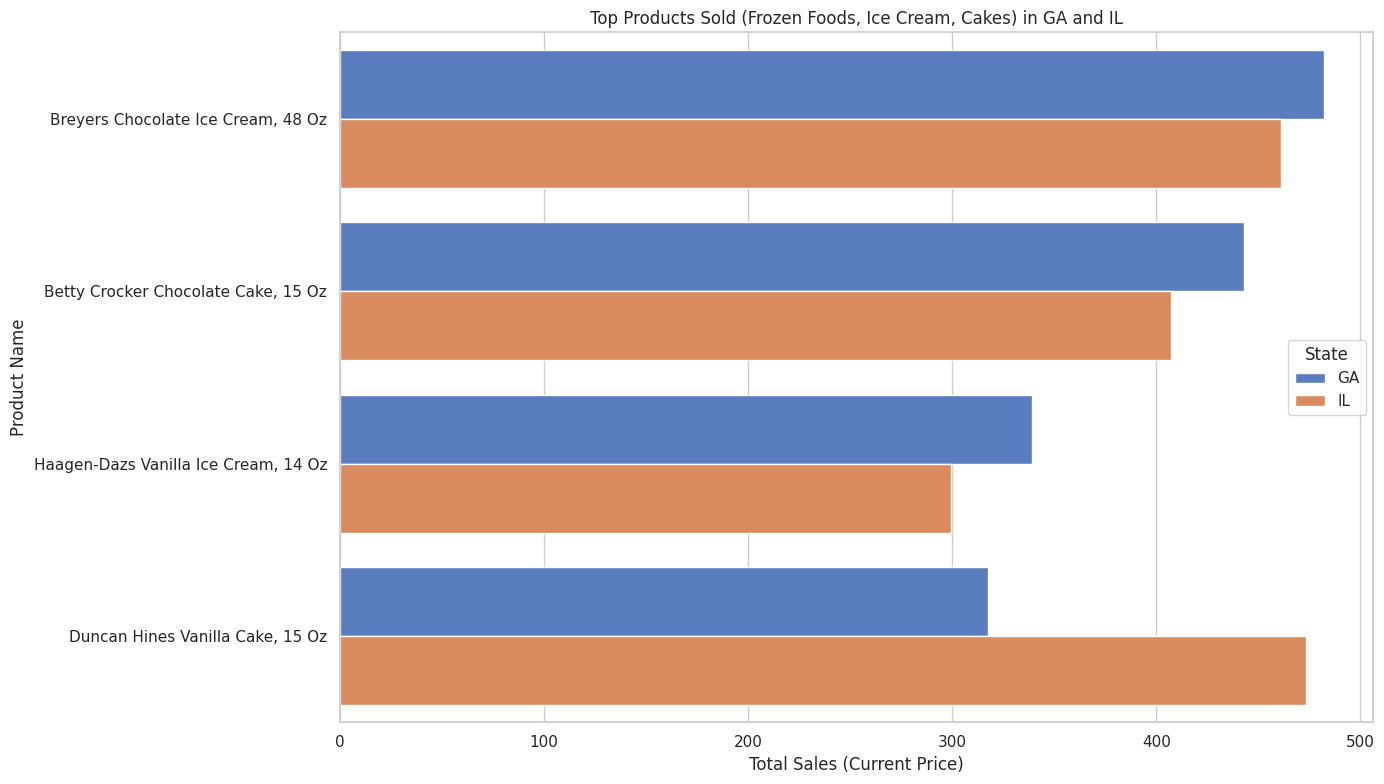

In [ ]:
# Filter the data for the specified categories and states
filtered_data = cleaned_data[
    cleaned_data['CATEGORY'].isin(['Frozen Foods', 'Ice Cream', 'Cakes']) &
    cleaned_data['State'].isin(['GA', 'IL'])
].copy()

# Calculate the total current price (sales) for each product name within the filtered data
product_sales = filtered_data.groupby(['State', 'PRODUCT_NAME'])['PRICE_CURRENT'].sum().reset_index()

# Get the top products within each state for these categories
# Using nlargest to get the top products by 'PRICE_CURRENT' within each state group
top_products_by_state = product_sales.groupby('State').apply(lambda x: x.nlargest(5, 'PRICE_CURRENT')).reset_index(drop=True) # Adjust 5 if you want more/fewer top products

# Create the bivariate graph
plt.figure(figsize=(14, 8))
sns.barplot(data=top_products_by_state, x='PRICE_CURRENT', y='PRODUCT_NAME', hue='State', palette='muted')
plt.title('Top Products Sold (Frozen Foods, Ice Cream, Cakes) in GA and IL')
plt.xlabel('Total Sales (Current Price)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

These are the products that  we see **strong customer demand** in those particular states which belong to the highely sold categories as well

**Categories**:                                    
  
Frozen Meals

Cakes and Baked Goods

Ice Cream and Frozen Desserts

  **Products:**


1.Breyers Chocolate Ice Cream

2.Haagen-Dazs Vanilla Ice Cream

3.Betty Crocker Chocolate Cake

## **Total Sales by Season**

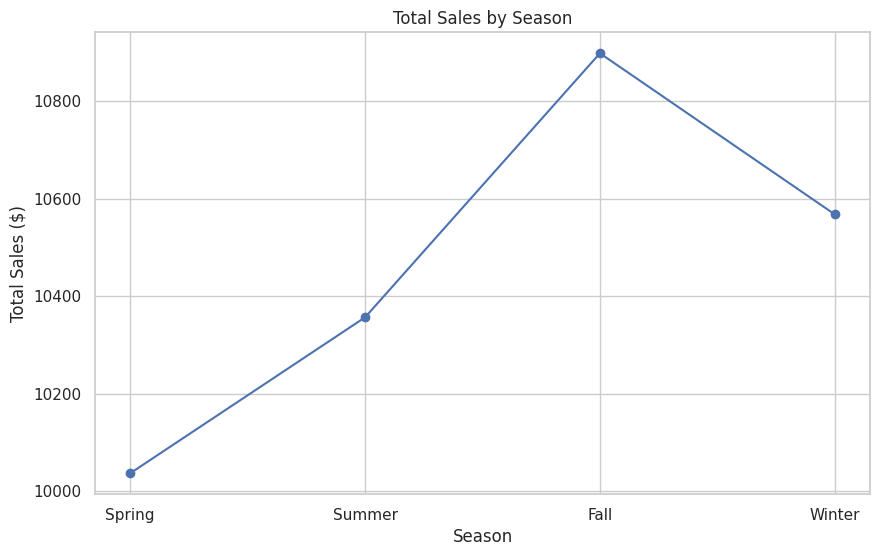

Season with the highest sales:
Fall


In [ ]:
# Calculate total sales by season
sales_by_season = cleaned_data.groupby('Season')['PRICE_CURRENT'].sum().reset_index()

# Ensure the seasons are in a meaningful order for the plot
season_order = ['Spring', 'Summer', 'Fall','Winter']
sales_by_season['Season'] = pd.Categorical(sales_by_season['Season'], categories=season_order, ordered=True)

# Sort by the ordered Season
sales_by_season = sales_by_season.sort_values('Season')

plt.figure(figsize=(10, 6))
plt.plot(sales_by_season['Season'], sales_by_season['PRICE_CURRENT'], marker='o', linestyle='-')
plt.title('Total Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Sales ($)') # Add dollar sign for clarity
plt.grid(True)
plt.show()

# Find the season with the highest sales
highest_sales_season = sales_by_season.loc[sales_by_season['PRICE_CURRENT'].idxmax()]

print("Season with the highest sales:")
print(highest_sales_season.iloc[0])

We observe that **RAINFALL**  season has the Highest sales generating revenue around **$10900** and **Spring records for the lowest total revenue**

## **Top Categories and  Products Sold in RainFall Season**

/tmp/ipython-input-20-2508728361.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Category', data=fall_category_counts.head(10), palette='viridis') # Showing top 10 categories


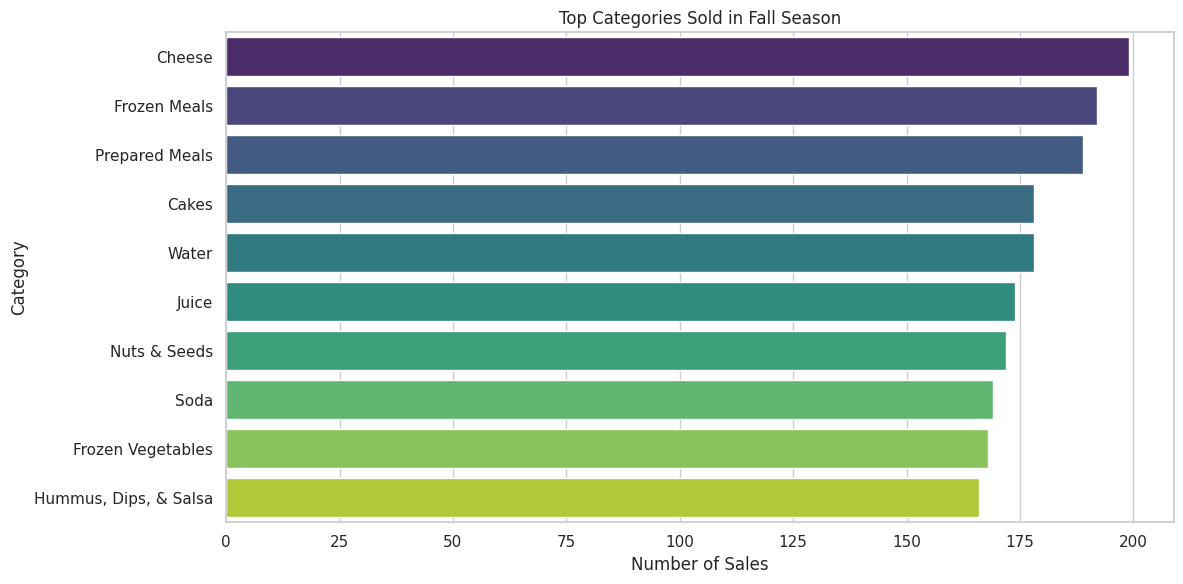

/tmp/ipython-input-20-2508728361.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Product', data=fall_product_counts.head(15), palette='magma') # Showing top 15 products


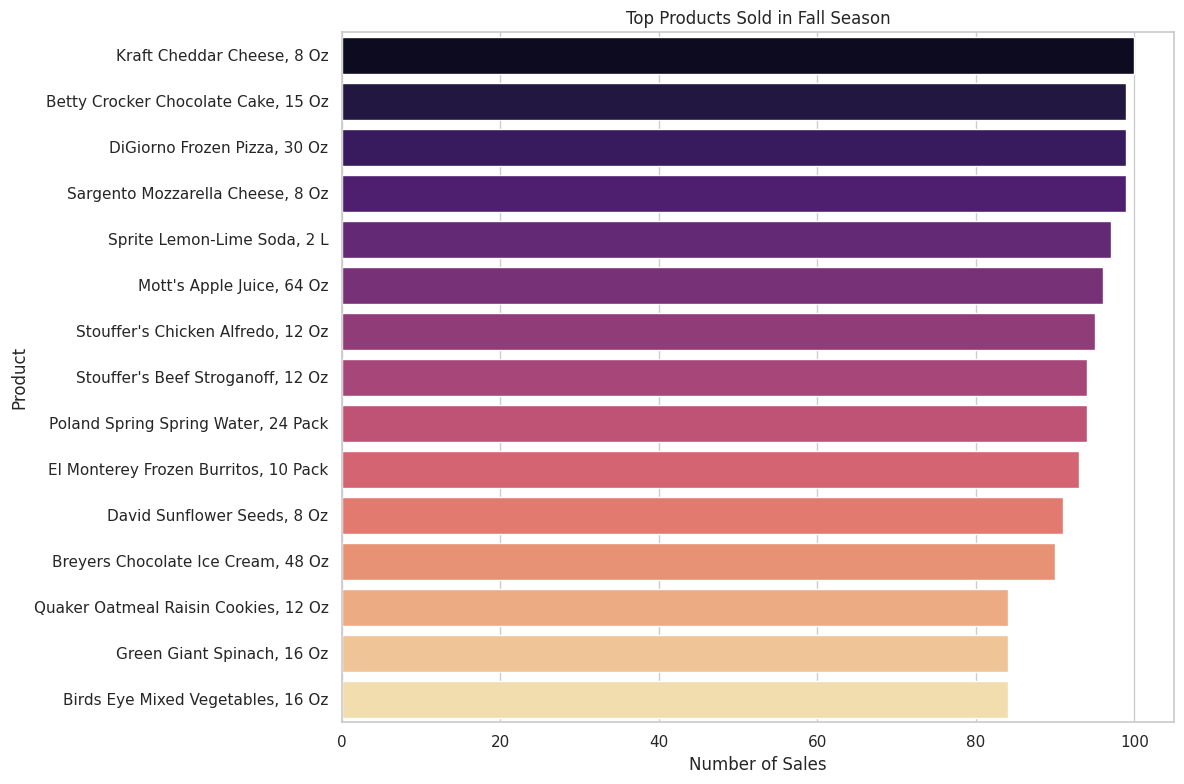

In [ ]:
fall_data = cleaned_data[cleaned_data['Season'] == 'Fall']

# Count the occurrences of each category and product in Fall
fall_category_counts = fall_data['CATEGORY'].value_counts().reset_index()
fall_category_counts.columns = ['Category', 'Count']

fall_product_counts = fall_data['PRODUCT_NAME'].value_counts().reset_index()
fall_product_counts.columns = ['Product', 'Count']

# Plotting categories sold in Fall
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Category', data=fall_category_counts.head(10), palette='viridis') # Showing top 10 categories
plt.title('Top Categories Sold in Fall Season')
plt.xlabel('Number of Sales')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# Plotting products sold in Fall
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Product', data=fall_product_counts.head(15), palette='magma') # Showing top 15 products
plt.title('Top Products Sold in Fall Season')
plt.xlabel('Number of Sales')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

**Top Categories sold in Fall season are:**

1.CHEESE

2.FROZEN MEALS

3.PREPARED MEALS

**Top Products sold in Fall season are**

1.Kraft Cheddar Cheese, 8 Oz

2.etty Crocker Chocolate Cake, 15 Oz

3.DiGiorno Frozen Pizza, 30 Oz

## **Distribution of Products Sold in "Cheese" Category during Fall Season**

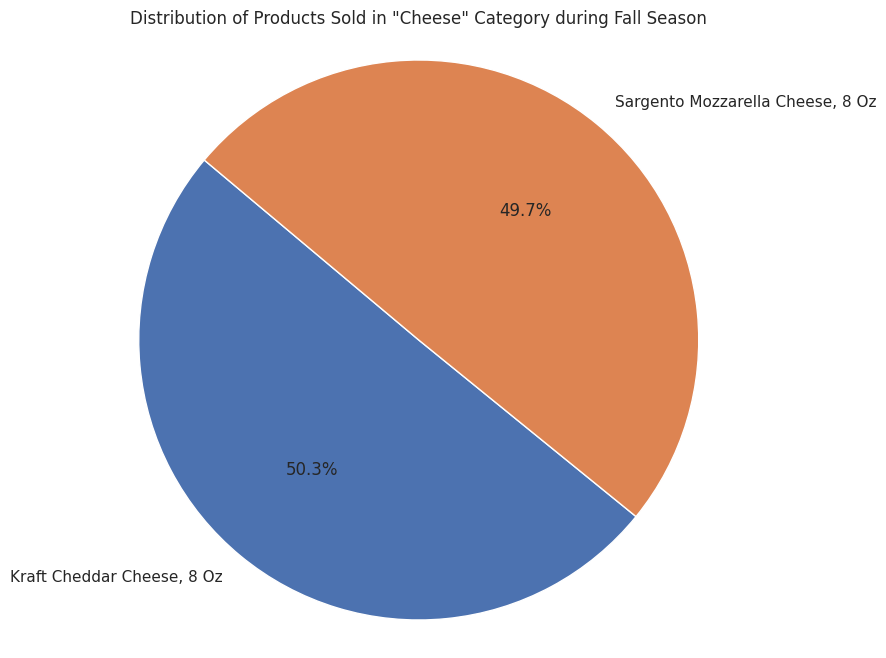

In [ ]:
# Filter data for 'Fall' season and 'CHEESE' category
cheese_fall_data = cleaned_data[(cleaned_data['Season'] == 'Fall') & (cleaned_data['CATEGORY'] == 'Cheese')]

# Count the occurrences of each product in the filtered data
cheese_product_counts = cheese_fall_data['PRODUCT_NAME'].value_counts().reset_index()
cheese_product_counts.columns = ['Product', 'Count']

# Plotting the pie chart for products sold in the 'Cheese' category during 'Fall'
plt.figure(figsize=(10, 8))
plt.pie(cheese_product_counts['Count'], labels=cheese_product_counts['Product'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Products Sold in "Cheese" Category during Fall Season')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

we observe that there are 2 products under cheese Category which are in Demand in Fall Season i.e  **"Kraft Cheddar Cheese"
 and
"Sargento Mozzarella Cheese"**

## **Total Sales by Year**

/tmp/ipython-input-22-625901390.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='year', y='PRICE_CURRENT', data=total_sales_by_year, palette='viridis')


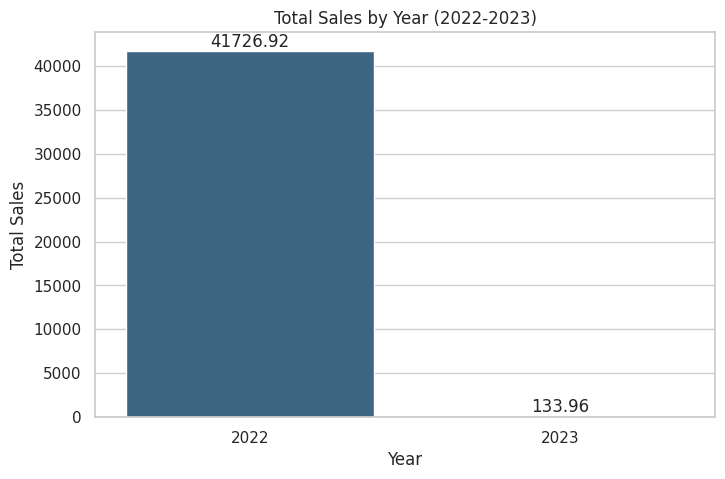

In [ ]:
sales_2022_2023 = cleaned_data[cleaned_data['year'].isin([2022, 2023])]
total_sales_by_year = sales_2022_2023.groupby('year')['PRICE_CURRENT'].sum().reset_index()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='year', y='PRICE_CURRENT', data=total_sales_by_year, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Total Sales by Year (2022-2023)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=0) # Ensure years are displayed horizontally
plt.show()

The sales data primarily represents the year 2022, with a total of 41,726.92 in sales. The value shown for 2023 (133.96) is extremely low, indicating that complete sales data for 2023 is not available. The recorded sales for 2023 likely represent only the beginning of the year, rather than the full period.So it is **better to eliminate 2023 data** and focus on 2022.

## **Total Sales in 2022 (Also in Month wise)**

Shape of data after removing 2023: (9970, 16)
Years present in the new data: [2022]


/tmp/ipython-input-23-2064227353.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='month_name', y='PRICE_CURRENT', data=sales_by_month_2022, palette='viridis')


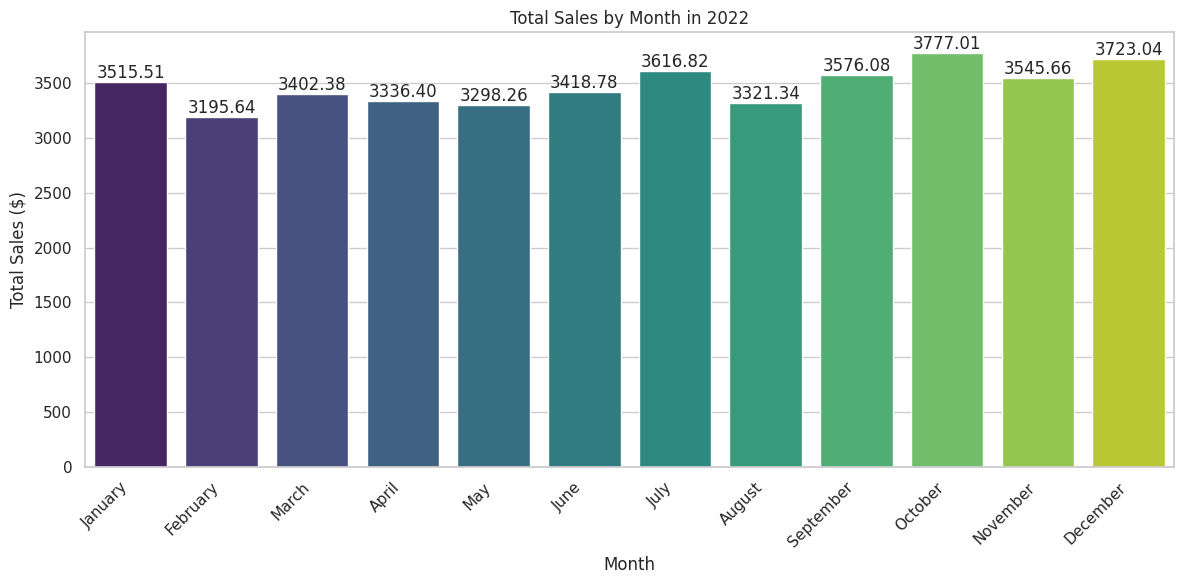

In [ ]:
# Remove 2023 data
cleaned_data_2022 = cleaned_data[cleaned_data['year'] == 2022].copy()

# Verify the removal
print("Shape of data after removing 2023:", cleaned_data_2022.shape)
print("Years present in the new data:", cleaned_data_2022['year'].unique())

# Visualize total sales by month for 2022
sales_by_month_2022 = cleaned_data_2022.groupby('month_name')['PRICE_CURRENT'].sum().reset_index()

# Define the order of months for correct plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sales_by_month_2022['month_name'] = pd.Categorical(sales_by_month_2022['month_name'], categories=month_order, ordered=True)
sales_by_month_2022 = sales_by_month_2022.sort_values('month_name')


plt.figure(figsize=(12, 6))
ax = sns.barplot(x='month_name', y='PRICE_CURRENT', data=sales_by_month_2022, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Total Sales by Month in 2022')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout
plt.show()

**Total Sales throughout the year is similar**

## **Categories of Products Sold Across All Months in 2022**

/tmp/ipython-input-24-1133314352.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_top_category_counts['month_name'] = pd.Categorical(monthly_top_category_counts['month_name'], categories=month_order, ordered=True)


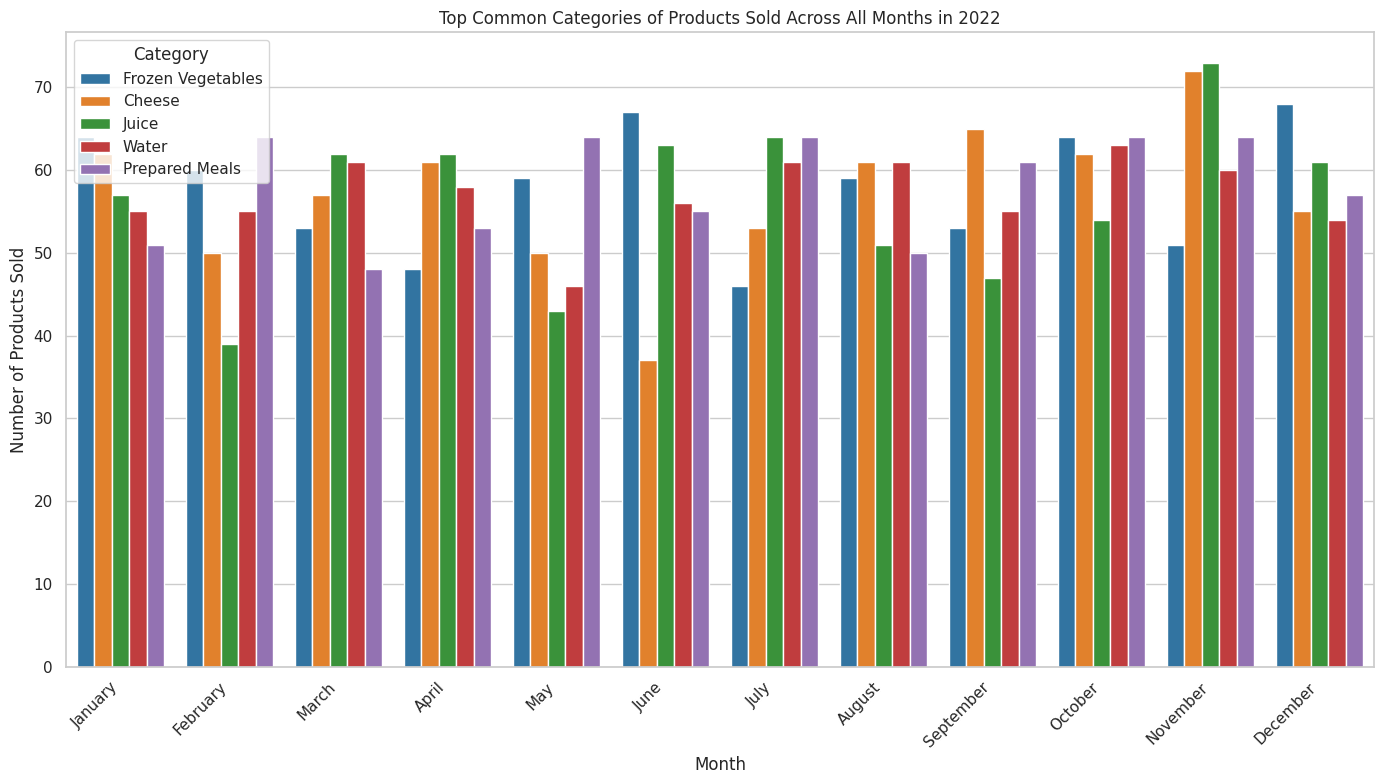

In [ ]:
# Aggregate data by month and category and count the occurrences
monthly_category_counts = cleaned_data_2022.groupby(['month_name', 'CATEGORY']).size().reset_index(name='count')

# Get the top N categories for visualization (e.g., top 5)
top_categories_overall = cleaned_data_2022['CATEGORY'].value_counts().nlargest(5).index.tolist()

# Filter the monthly counts to include only the top categories
monthly_top_category_counts = monthly_category_counts[monthly_category_counts['CATEGORY'].isin(top_categories_overall)]

# Define the order of months for correct plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_top_category_counts['month_name'] = pd.Categorical(monthly_top_category_counts['month_name'], categories=month_order, ordered=True)
monthly_top_category_counts = monthly_top_category_counts.sort_values(['month_name', 'count'], ascending=[True, False])

# Create the visualization
plt.figure(figsize=(14, 8))
sns.barplot(data=monthly_top_category_counts, x='month_name', y='count', hue='CATEGORY', palette='tab10')
plt.title('Top Common Categories of Products Sold Across All Months in 2022')
plt.xlabel('Month')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

**Summary**

**March–July**:  Focuses on Juice and Water — summer hydration and refreshment.

 **July–November**: Cheese inventory — increased usage in cooking.

**All Year**: Maintaining consistent stock of **Frozen Vegetables, Prepared Meals, and Water — they are everyday essentials**

## **Top 5 Brands by Total Sales**

Top 5 Brands by Total Sales in 2022:
            BRAND  PRICE_CURRENT
24     Stouffer's        3468.05
10    El Monterey        2434.25
8        DiGiorno        2418.54
4         Breyers        2138.94
1   Betty Crocker        2126.45


/tmp/ipython-input-90-2803157883.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PRICE_CURRENT', y='BRAND', data=top_5_brands, palette='viridis')


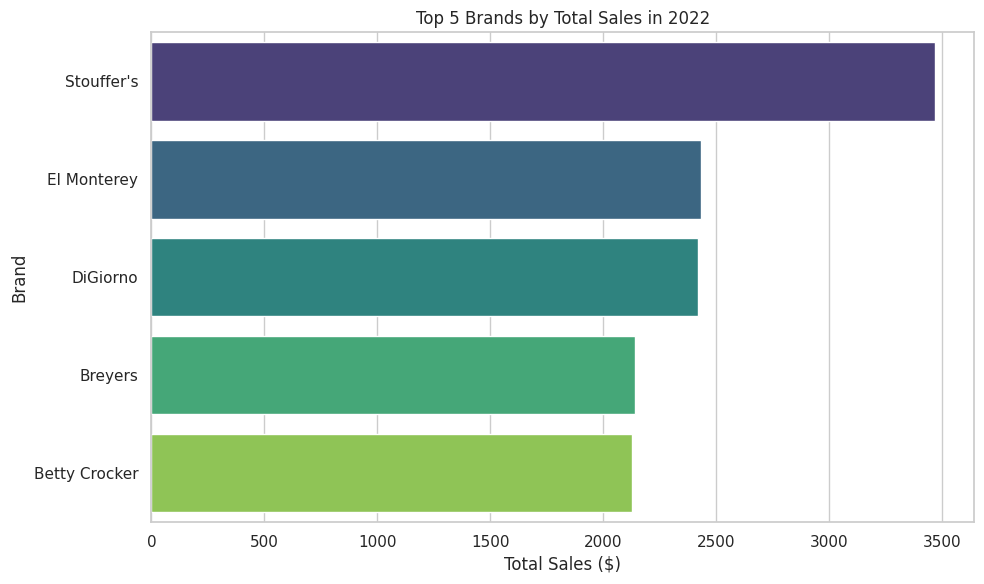

In [ ]:
# Calculate total sales for each brand
brand_sales = cleaned_data_2022.groupby('BRAND')['PRICE_CURRENT'].sum().reset_index()
# Sort brands by total sales in descending order and get the top 5
top_5_brands = brand_sales.sort_values(by='PRICE_CURRENT', ascending=False).head(5)
print("Top 5 Brands by Total Sales in 2022:")
print(top_5_brands)
# Create a bar plot for the top 5 brands
plt.figure(figsize=(10, 6))
sns.barplot(x='PRICE_CURRENT', y='BRAND', data=top_5_brands, palette='viridis')
plt.title('Top 5 Brands by Total Sales in 2022')
plt.xlabel('Total Sales ($)')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

These are the Top 5 brands that were sold in the year 2022

## **Top 5 Brands: Product-wise Sales Breakdown**

Top 5 Brands by Total Sales:
             BRAND  PRICE_CURRENT
24     Stouffer's        3468.05
10    El Monterey        2434.25
8        DiGiorno        2418.54
4         Breyers        2138.94
1   Betty Crocker        2126.45
Brands in grouped data: ['Betty Crocker' 'Breyers' 'DiGiorno' 'El Monterey' "Stouffer's"]
Brands in final plot: ["Stouffer's", 'El Monterey', 'DiGiorno', 'Breyers', 'Betty Crocker']


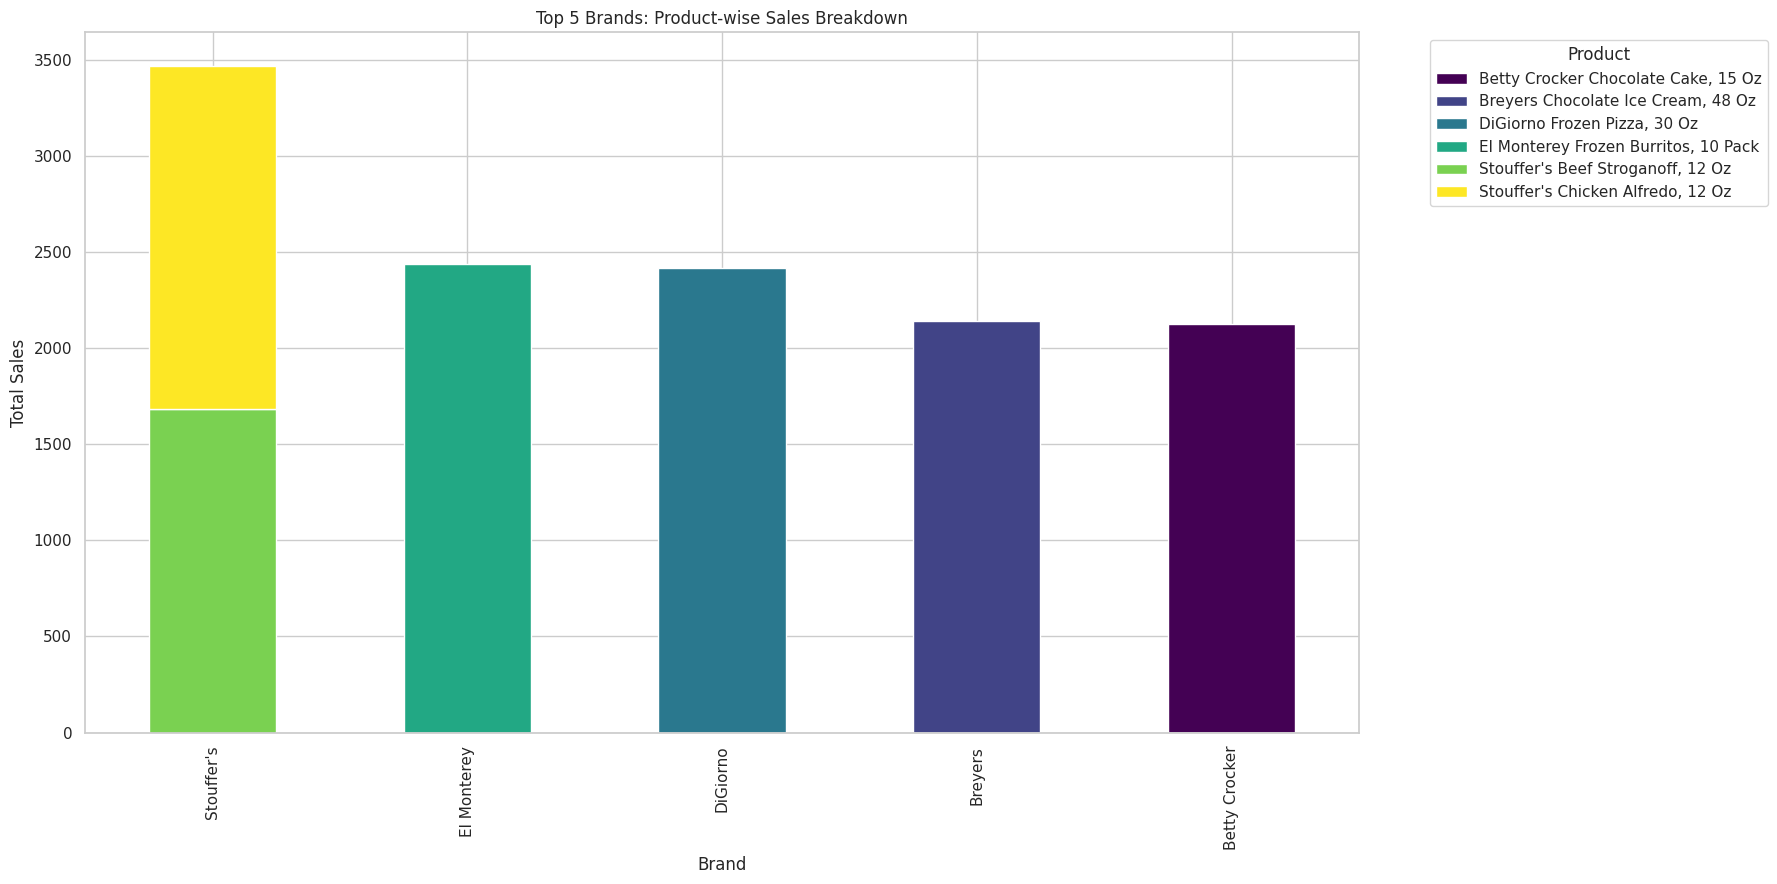

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate top 5 brands by total sales
brand_sales = cleaned_data_2022.groupby('BRAND', as_index=False)['PRICE_CURRENT'].sum()
top_5_df = brand_sales.sort_values(by='PRICE_CURRENT', ascending=False).head(5)
top_5_brands = top_5_df['BRAND'].tolist()

# Debug print
print("Top 5 Brands by Total Sales:\n", top_5_df)

# Step 2: Filter the cleaned data to only top 5 brands
filtered_data = cleaned_data_2022[cleaned_data_2022['BRAND'].isin(top_5_brands)]

# Step 3: Group by BRAND and PRODUCT_NAME
brand_product_sales = filtered_data.groupby(['BRAND', 'PRODUCT_NAME'], as_index=False)['PRICE_CURRENT'].sum()

# Debug print
print("Brands in grouped data:", brand_product_sales['BRAND'].unique())

# Step 4: Pivot
pivot_df = brand_product_sales.pivot(index='BRAND', columns='PRODUCT_NAME', values='PRICE_CURRENT')

# Ensure correct brand order
pivot_df = pivot_df.reindex(top_5_brands).fillna(0)

# Final debug print
print("Brands in final plot:", pivot_df.index.tolist())

# Step 5: Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(18, 9), colormap='viridis')
plt.title('Top 5 Brands: Product-wise Sales Breakdown')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# **Summary**

**1.Stock Frozen Foods, Ice Cream & Cakes More in GA and IL**

These are the top-selling categories in Georgia (GA) and Illinois (IL).
 Ensuring high availability of these products especially in the top-performing counties like Cook County (IL) and Fulton County (GA) will increase sales.

**2.Prioritizing Top Products in These States**

Products like:

*Breyers Chocolate Ice Cream

*Betty Crocker Chocolate Cake

*Haagen-Dazs Vanilla Ice Cream
are best sellers in GA and IL.
 Promoting and bundling these products during peak months for even higher conversion.

**3.Boost Inventory & Marketing in Fall Season**

Sales are highest in Fall, indicating higher customer activity.
 Launching promotions, combo offers, and increase stock in fall to maximize profits.Focus More on Fulton & Cook Counties

**4.These counties show higher overall sales.**

 Tailor regional marketing campaigns and optimize logistics for these high-demand areas.

**5.Top Brands Driving Sales**

Brands like Stouffer’s, El Monterey, DiGiorno, Breyers, and Betty Crocker are leading in sales.
Collaborating with these brands for co-branded campaigns or discounts.

**6.Diversify Category Offering**

Balanced category sales suggest that variety is important..

















